# Random Forest Classifier
Dec2020
@author:Ines
@editor:Ines

In [1]:
"""
IMPORTS
"""
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from scipy import stats

# --Get my functions
from random_forest_functions import query_subjects, training_trials, design_matrix

Connecting ines.laranjeira@datajoint.internationalbrainlab.org:3306


In [2]:
"""
QUERY DATA WITH DATAJOINT
"""

subjects = query_subjects(as_dataframe=False, criterion='trained')
trials = training_trials(subjects)  # Gets all trials for all mice for first 5 sessions, hard-coded

In [3]:
"""
DESIGN MATRIX
"""
matrix = design_matrix(trials, subjects, session=5) 

/anaconda3/envs/iblenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/anaconda3/envs/iblenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/Users/ineslaranjeira/Documents/Repositories/paper-data-architecture/random_forest_functions.py:392: RuntimeWarning: Mean of empty slice
  session, 'performance_easy']) - np.nanmean(
/anaconda3/envs/iblenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/anaconda3/envs/iblenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/anaconda3/envs/iblenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/

/Users/ineslaranjeira/Documents/Repositories/paper-data-architecture/random_forest_functions.py:383: RuntimeWarning: Mean of empty slice
  'performance_easy'])
/anaconda3/envs/iblenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/ineslaranjeira/Documents/Repositories/paper-data-architecture/random_forest_functions.py:392: RuntimeWarning: Mean of empty slice
  session, 'performance_easy']) - np.nanmean(
/Users/ineslaranjeira/Documents/Repositories/paper-data-architecture/random_forest_functions.py:394: RuntimeWarning: Mean of empty slice
  'performance_easy'])
/anaconda3/envs/iblenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/anaconda3/envs/iblenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axi

Mouse 1627878b-0863-4241-9396-43f89d6d70af missing starting weight
Mouse 1627878b-0863-4241-9396-43f89d6d70af missing data
Mouse 18a54f60-534b-4ed5-8bda-b434079b8ab8 missing starting weight
Mouse 18a54f60-534b-4ed5-8bda-b434079b8ab8 missing data
Mouse 354e6122-de4a-4945-bafd-d46df65768f6 missing starting weight
Mouse 354e6122-de4a-4945-bafd-d46df65768f6 missing data
Mouse 726e6b19-e9ef-4e37-a7d7-986d5bcd551c missing data
Mouse 7d334e82-1270-4346-86c2-4a8b7530946d missing data
Mouse 94aca514-aeed-4189-8123-24099bb03452 missing starting weight
Mouse 94aca514-aeed-4189-8123-24099bb03452 missing data
Mouse 95241a9c-481b-443c-83a7-462165f729ec missing starting weight
Mouse 95241a9c-481b-443c-83a7-462165f729ec missing data
Mouse 9a46fcfa-81cf-4742-87c0-bb95f90d5913 missing starting weight
Mouse 9a46fcfa-81cf-4742-87c0-bb95f90d5913 missing data
Mouse 9b471b07-5903-4baa-b56d-368d385c850c missing starting weight
Mouse 9b471b07-5903-4baa-b56d-368d385c850c missing data
Mouse c00e0ffb-b8c6-4953-b9

In [4]:
matrix.dropna()

,subject_uuid,training_time,quantile,perf_init,RT_init,trials_init,delta_variance,trials_sum,perf_delta1,RT_delta1,...,weekend_water,weight_start,weight_loss,water_weight,temperature_c,air_pressure_mb,relative_humidity,subject_nickname,food,light
0,0f47b24d-3909-428c-a18d-666006c7c834,27.0,4.0,0.413333,15.7527,150,0,1207,0.062343,-8.88865,...,0,18.06,0.956061,4.75562,27.614916,1011.466799,22.826104,NYU-11,19.0,1.0
2,2714cd11-363a-44bd-b57d-c91870ad0671,32.0,4.0,0.466346,6.0154,208,-0.5,1229,-0.080287,-1.2492,...,0,16.8,0.951302,5.3078,27.473407,1014.177293,22.603806,NYU-14,19.0,1.0
3,34ff50d4-42cf-41f7-8c38-ab631ca84d74,25.0,4.0,0.263804,29.3882,163,0,991,-0.006228,-11.5227,...,1,17.5,0.906736,1.97202,28.384417,1013.874152,33.431067,IBL-T4,19.0,1.0
4,3eee82bf-8ccf-42ac-9e26-472caed5f265,8.0,1.0,0.415493,3.82195,426,0.5,3236,0.215015,-0.396351,...,1,20.3,0.91236,40.1636,27.265362,1010.439559,41.891466,NYU-02,19.0,1.0
7,b4cb0a93-4975-4a2d-aa12-94461d457594,17.0,3.0,0.480938,4.071,341,0,2484,0.043582,-1.4279,...,0,16.89,0.918934,25.3047,27.913914,1013.900915,21.524134,NYU-12,19.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,adf9e948-262f-4fa0-84c6-85dae8a384b3,8.0,1.0,0.5,1.8294,518,-0.5,1473,-0.153595,3.4876,...,1,18.37,0.6754,10.7462,28.290599,1013.999652,44.590972,CSH_ZAD_006,20.0,0.0
138,e0b2075a-7a47-473c-9cdd-426dd20f6dfa,8.0,1.0,0.434164,2.5671,281,0.5,1993,0.405731,-0.7568,...,1,19.07,0.879207,20.9482,26.774942,1013.661305,43.401573,CSH_ZAD_002,20.0,0.0
140,4dc08527-efd9-41c7-b907-f610f3ad41ae,10.0,2.0,0.478448,4.00125,232,0,2247,0.003964,-3.21315,...,1,17.74,0.799459,42.155,27.369390,1013.695287,46.730602,CSH_ZAD_004,20.0,0.0
141,c0131499-855d-4513-851b-037438214cf6,15.0,3.0,0.473068,1.27745,427,-0.5,2178,-0.007264,0.401152,...,0,18.54,0.894318,19.7988,28.298010,1018.824354,25.585950,CSH_ZAD_017,20.0,0.0


In [5]:
np.max(matrix['training_time'])

59.0

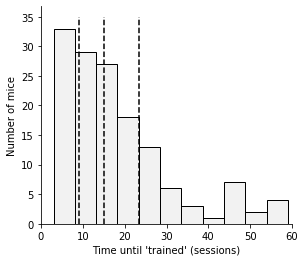

In [6]:
"""
HISTOGRAM - include all mice used to calculate quartiles
"""

crit = matrix['training_time']
quantiles = crit.quantile([.25, .5, .75])

plt.figure(figsize=[4.5, 4])
plt.xlabel("Time until 'trained' (sessions)")
plt.ylabel("Number of mice")
plt.xlim([0,60])
plt.rc('font', size=12)
sns.despine(top=True, right=True)
points = sns.histplot(list(matrix['training_time'].dropna()), kde=False, color='black', edgecolor='k', alpha=0.05, linewidth=1) 
plt.vlines(quantiles[0.25], 0, 35, colors='k', linestyles='dashed')
plt.vlines(quantiles[0.5], 0, 35, colors='k', linestyles='dashed')
plt.vlines(quantiles[0.75], 0, 35, colors='k', linestyles='dashed')

In [7]:
"""
PROCESS DESIGN MATRIX
"""

# --Remove NaNs and mouse column from design matrix

mat = matrix.copy()
var = 'quantile'

mat = mat.drop(columns=['subject_nickname', 'subject_uuid', 'training_time'])
mat = mat.dropna()

mat1 = mat.copy() # Full classifier
mat2 = mat1[['perf_delta1', var]] # Performance change classifier; get matrix from mat1, to make sure the same mice are included

In [8]:
"""
RUN MODEL
"""

# Generate random states for each iteration with a fixed seed
# Loop over iterations of random draws of mice

iterations = 100
model = RandomForestClassifier(random_state=0)
matrices = [mat1, mat2]

decoding_result = pd.DataFrame(columns=['matrix', 'iter', 'f1', 'confusion_matrix', 
    'f1_shuffle', 'confusion_matrix_shuffle'])
permutation_df = pd.DataFrame(columns=np.append(mat[mat.columns.difference([var])].keys(), ['iter', 'repeat', 'matrix']))
prediction_df = pd.DataFrame(columns=['matrix', 'iter', '1', '2', '3', '4'])


for m, mt in enumerate(matrices):

    # Determine minimum number of mice per quartile (N)
    q_1 = matrices[m].loc[matrices[m][var] == 1]
    q_2 = matrices[m].loc[matrices[m][var] == 2]
    q_3 = matrices[m].loc[matrices[m][var] == 3]
    q_4 = matrices[m].loc[matrices[m][var] == 4]
    n_mice = np.min([len(q_1), len(q_2), len(q_3), len(q_4)])
    labels = np.array(matrices[m][var])
    shuffled_labels = np.random.shuffle(labels)
    labels_nr = np.arange(labels.shape[0])

    dec_result = pd.DataFrame(columns=['matrix', 'iter', 'f1', 'confusion_matrix', 
        'f1_shuffle', 'confusion_matrix_shuffle'])

    for i in range(iterations):
        if np.mod(i+1, 10) == 0:
            print('Iteration %d of %d' % (i+1, iterations))   

        # Randomly select N mice from each quartile to equalize classes
        use_subject = np.empty(0, dtype=int)
        for j, q in enumerate(np.unique(labels)):
            use_subject = np.concatenate([use_subject, np.random.choice(labels_nr[labels == q],
                                                                   n_mice, replace=False)])
        # Decoding function with 10-fold cross validation
        kf = KFold(n_splits=10, shuffle=False)
        use_matrix = matrices[m]
        use_mat = use_matrix.iloc[use_subject]

        # -- ORIGINAL DATASET
        y_pred = np.zeros(len(use_mat), dtype=int) 
        exog = use_mat[use_mat.columns.difference([var])]
        endog = use_mat.loc[:, var]

        for train_index, test_index in kf.split(use_mat):
            model.fit(exog.iloc[train_index], endog.iloc[train_index].astype(int))
            y_pred[test_index] = model.predict(exog.iloc[test_index])

        # --Permutation scores
        overall_model = model.fit(exog, endog.astype(int))
        overall_permutation = permutation_importance(overall_model, exog, 
            endog.astype(int), n_repeats=10, random_state=0, scoring='f1_micro')
        perm_df = pd.DataFrame([est for est in overall_permutation.importances.T],
        columns=exog.keys())
        perm_df['iter'] = i
        perm_df['repeat'] = pd.Series(range(10))
        perm_df['matrix'] = m
        permutation_df = pd.concat([permutation_df, perm_df])

        f1 = f1_score(endog.astype(int), y_pred.astype('int'), average='micro')
        cm = confusion_matrix(endog.astype(int), y_pred.astype('int'), normalize='true')

        pred_df = pd.DataFrame(columns=['matrix', 'iter', '1', '2', '3', '4'], index=[1])
        pred_df['1'] = cm.ravel()[0] 
        pred_df['2'] = cm.ravel()[5]
        pred_df['3'] = cm.ravel()[10]
        pred_df['4'] = cm.ravel()[15] 
        pred_df['iter'] = i
        pred_df['matrix'] = m
        prediction_df = pd.concat([prediction_df, pred_df])

        dec_result.loc[i, 'f1'] = f1
        dec_result.loc[i, 'confusion_matrix'] = cm
        dec_result.loc[i, 'matrix'] = m
        dec_result.loc[i, 'iter'] = i

        # -- SHUFFLED DATASET 
        shuffle_y_pred = np.zeros(len(use_mat), dtype=int) 
        shuffle_endog = endog.copy()
        np.random.shuffle(shuffle_endog.values)

        for train_index, test_index in kf.split(use_mat):
            model.fit(exog.iloc[train_index], list(shuffle_endog.iloc[train_index].astype(int)))
            shuffle_y_pred[test_index] = model.predict(exog.iloc[test_index])   

        shuffle_f1 = f1_score(shuffle_endog.astype(int), shuffle_y_pred.astype('int'), average='micro')
        shuffle_cm = confusion_matrix(shuffle_endog.astype(int), shuffle_y_pred.astype('int'), normalize='true')

        # SAVE
        dec_result.loc[i, 'f1_shuffle'] = shuffle_f1
        dec_result.loc[i, 'confusion_matrix_shuffle'] = shuffle_cm

    decoding_result = pd.concat([decoding_result, dec_result])

Iteration 10 of 100
Iteration 20 of 100
Iteration 30 of 100
Iteration 40 of 100
Iteration 50 of 100
Iteration 60 of 100
Iteration 70 of 100
Iteration 80 of 100
Iteration 90 of 100
Iteration 100 of 100
Iteration 10 of 100
Iteration 20 of 100
Iteration 30 of 100
Iteration 40 of 100
Iteration 50 of 100
Iteration 60 of 100
Iteration 70 of 100
Iteration 80 of 100
Iteration 90 of 100
Iteration 100 of 100


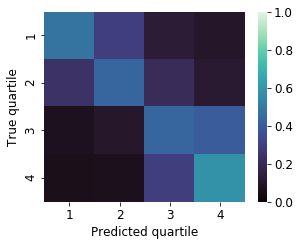

F1 results 0.4860869565217393


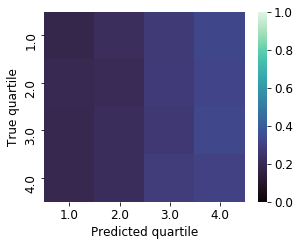

F1 shuffled results 0.24826086956521734


In [9]:
"""
PLOT RESULTS
"""

# -- Confusion Matrix
# Results on original model
plt.rc('font', size=12) 
plt.figure(figsize=[4.5, 3.5])
hmap = sns.color_palette("mako", as_cmap=True)
data = decoding_result.loc[decoding_result['matrix'] == 0]
sns.heatmap(data['confusion_matrix'].mean(), annot=False, 
    yticklabels=np.unique(labels.astype(int)), xticklabels=np.unique(labels.astype(int)), 
    cmap= hmap, vmin=0, vmax=1) 
plt.xlabel('Predicted quartile')
plt.ylabel('True quartile')
plt.show()
print('F1 results', data['f1'].mean())

# Results from shuffled model
plt.rc('font', size=12) 
plt.figure(figsize=[4.5, 3.5])
sns.heatmap(decoding_result['confusion_matrix_shuffle'].mean(), annot=False, 
    yticklabels=np.unique(labels), xticklabels=np.unique(labels), 
    cmap= hmap, vmin=0, vmax=1)
plt.xlabel('Predicted quartile')
plt.ylabel('True quartile')
plt.show()
print('F1 shuffled results',  decoding_result['f1_shuffle'].mean())

/anaconda3/envs/iblenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


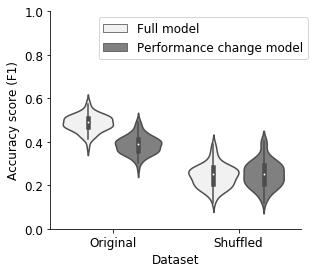

In [10]:
# -- F1 score per model, original and shuffled
data = decoding_result.copy()
data.loc[data['matrix'] == 0, 'matrix'] = 'Full model'
data.loc[data['matrix'] == 1, 'matrix'] = 'Performance change model'
data = data.rename(columns={'matrix': 'Model'})

f1 = data[['f1', 'Model']]
f1['Dataset'] = 'Original'
f1_shuffle = data[['f1_shuffle', 'Model']]
f1_shuffle = f1_shuffle.rename(columns={'f1_shuffle': 'f1'})
f1_shuffle['Dataset'] = 'Shuffled'

f1_scores = f1.append([f1_shuffle])

plt.rc('font', size=12) 
plt.figure(figsize=[4.5, 4])
f1_scores['f1'] = f1_scores['f1'].astype(float)
sns.violinplot(x='Dataset', y='f1', hue='Model', data=f1_scores, color='grey')
plt.ylim([0,1])
plt.ylabel('Accuracy score (F1)')
plt.legend(bbox_to_anchor=(1.05, 1))
sns.despine(top=True, right=True)

In [13]:
# -- Test for significance between Full and Performance change models
a = list(data.loc[data['Model'] == 'Full model', 'f1'])
b = list(data.loc[data['Model'] == 'Performance change model', 'f1'])
stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=10.809212099811726, pvalue=1.0562931367104371e-21)

In [11]:
# -- Test for significance between Full and Performance change models
a = list(data.loc[data['Model'] == 'Full model', 'f1'])
b = list(data.loc[data['Model'] == 'Performance change model', 'f1'])
stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=16.10837942271357, pvalue=7.371856922030832e-38)

Text(0.5, 0, 'Permutation importances')

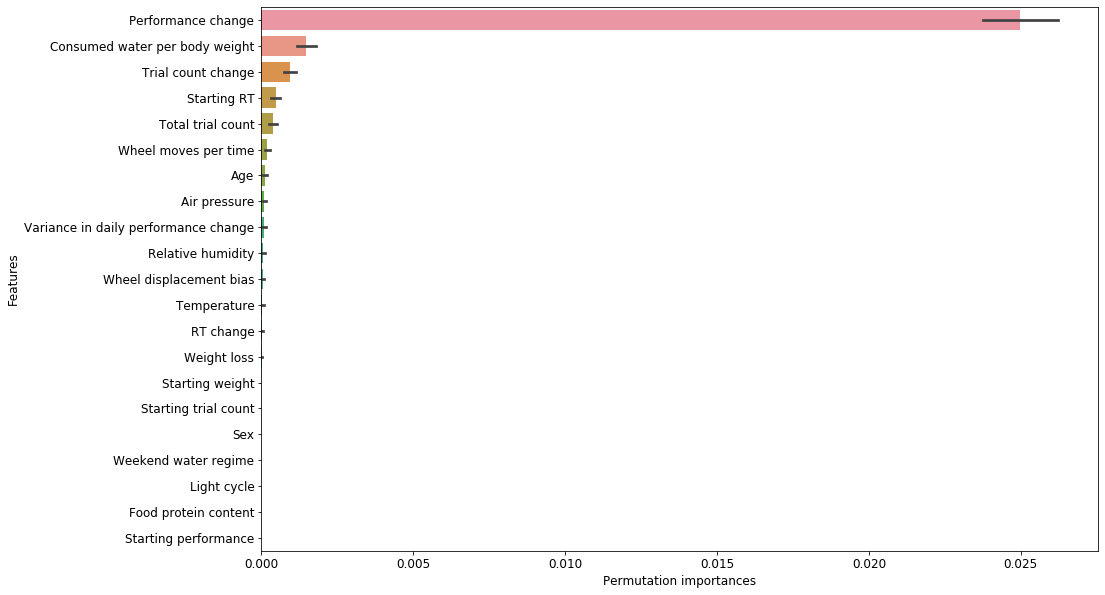

In [12]:
# -- Permutation tests for full model
data = permutation_df.loc[permutation_df.matrix==0]

data = data.rename(columns={'RT_delta1': 'RT change', 'RT_init': 'Starting RT',
    'age_start': 'Age', 'air_pressure_mb': 'Air pressure', 
    'delta_variance': 'Variance in daily performance change', 
    'disp_norm': 'Wheel displacement bias', 'moves_time': 'Wheel moves per time',
    'perf_init': 'Starting performance',
    'relative_humidity': 'Relative humidity', 'sex': 'Sex', 
    'temperature_c': 'Temperature', 'trials_delta1': 'Trial count change', 
    'trials_init': 'Starting trial count', 'trials_sum': 'Total trial count',
    'water_weight': 'Consumed water per body weight', 
    'weekend_water': 'Weekend water regime', 'weight_loss': 'Weight loss',
    'light': 'Light cycle', 'food': 'Food protein content',
    'weight_start': 'Starting weight', 'perf_delta1': 'Performance change'})

var_names = data.keys()[0:-3]

df = pd.melt(data, id_vars =['iter'], 
    value_vars = var_names)

# Mean over each iteration
data = pd.DataFrame(df.groupby(['iter', 'variable'])['value'].mean())
data = data.reset_index(level=[0, 1])
# Mean over all iterations
data = df.copy()

plot_order = data.groupby('variable')['value'].mean().sort_values(ascending=False).index.values
plt.figure(figsize=[15,10])
plt.rc('font', size=12) 
sns.barplot(y='variable', x='value', data=data, 
    order=plot_order, orient='h')
plt.ylabel('Features')
plt.xlabel('Permutation importances')